<a href="https://colab.research.google.com/github/AIM-IT4/Financial-Engineering-Codes/blob/main/Martingale_simulation_aka_conditional_expectations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[2.0816681711721685e-17, -1.1102230246251565e-16, 5.551115123125783e-17, 8.881784197001252e-16, 0.0, -2.220446049250313e-16, -2.220446049250313e-16, 0.0, 0.0, 4.440892098500626e-16, 0.0, -5.551115123125783e-17, 2.7755575615628914e-17, 0.0, -5.551115123125783e-17, 1.1102230246251565e-16, -4.440892098500626e-16, 0.0, 0.0, 5.551115123125783e-17, 0.0, 2.220446049250313e-16, 0.0, 0.0, 5.551115123125783e-17, -1.1102230246251565e-16, 0.0, 0.0, 0.0, 0.0, 0.0, -1.1102230246251565e-16, -4.440892098500626e-16, 1.1102230246251565e-16, 0.0, 2.220446049250313e-16, 0.0, -4.163336342344337e-17, -2.220446049250313e-16, 0.0, -1.1102230246251565e-16, 0.0, 0.0, -5.551115123125783e-17, 0.0, -4.440892098500626e-16, 2.7755575615628914e-17, 0.0, 0.0, 4.440892098500626e-16, 0.0, 0.0, 2.220446049250313e-16, 2.7755575615628914e-17, 0.0, -4.440892098500626e-16, 4.440892098500626e-16, 5.551115123125783e-17, 2.220446049250313e-16, 0.0, 0.0, -1.1102230246251565e-16, 0.0, 5.551115123125783e-17, 4.440892098500626e-16,

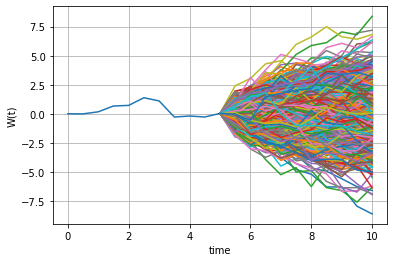

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
t = 10 
s = 5
NoOfPaths=1000
NoOfSteps=10

# First part to caclulate E(W(t)|F(0)) = W(0)=0
def martingaleA():
    W_t = np.random.normal(0.0,pow(t,0.5),[NoOfPaths,1])
    E_W_t = np.mean(W_t)
    print("mean value equals to: %.2f while the expected value is W(0) =%0.2f " %(E_W_t,0.0))
    
# Second part requiring nested Monte Carlo simulation  E(W(t)|F(s)) = W(s)
def martingaleB():    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths,NoOfSteps+1])
        
    # time-step from [t0,s]
    dt1 = s / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + pow(dt1,0.5)*Z[:,i]
            
    #W_s is the last column of W
    W_s = W[:,-1]
    #for every path W(s) we perform sub-simulation until time t and calculate
    #the expectation
    # time-step from [s,t]
    dt2     = (t-s)/float(NoOfSteps);
    W_t     = np.zeros([NoOfPaths,NoOfSteps+1]);
    
    #Store the results
    E_W_t = np.zeros([NoOfPaths])
    Error=[]
    for i in range(0,NoOfPaths):
        #Sub-simulation from time "s" until "t"
        W_t[:,0] = W_s[i];
        Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
        for j in range(0,NoOfSteps):
            #this is a scaling that ensures that Z has mean 0 and variance 1
            Z[:,j] = (Z[:,j]-np.mean(Z[:,j])) / np.std(Z[:,j]);
            #path simulation, from "s" until "t"
            W_t[:,j+1] = W_t[:,j] + pow(dt2,0.5)*Z[:,j];        
            
        E_W_t[i]=np.mean(W_t[:,-1])
        Error.append(E_W_t[i]-W_s[i])
        
        #Generate a plot for the first path
        if i==0:
            plt.plot(np.linspace(0,s,NoOfSteps+1),W[0,:])
            for j in range(0,NoOfPaths):
                plt.plot(np.linspace(s,t,NoOfSteps+1),W_t[j,:])
            plt.xlabel("time")
            plt.ylabel("W(t)")
            plt.grid()
        
    print(Error)
    error = np.max(np.abs(E_W_t-W_s))
    print("The error is equal to: %.18f"%(error))
    
martingaleB()